In [166]:
# Import necessary libraries
import tensorflow as tf
import tensorflow 

from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from numpy import *

In [167]:
# Load the MNIST dataset
(X_train_images, y_train_labels), (X_test_images, y_test_labels) = mnist.load_data()

In [168]:
X_train_images.shape

(60000, 28, 28)

In [169]:
def displayData(X, example_width = 1):
    #Compute rows, cols
    m, n = X.shape
    example_height = int(sqrt(n)) 
    example_width  = example_height
    #Compute number of digits to display
    display_rows = int(floor(sqrt(m)))
    display_cols = int(ceil(m / display_rows))
    
    # Padding between images
    pad = 1

    #Setup black display
    display_array = -ones((pad + display_rows * (example_height+pad), pad + display_cols * (example_width + pad)), float);
    curr_ex = 0
    for j in range(display_rows):
        for i in range(display_cols):
            if curr_ex > (m-1):
                break
            x = pad + j * (example_height + pad) + arange(example_height)
            y = pad + i * (example_width + pad) + arange(example_width)
            
            display_array[x[0]:(x[-1]+1),y[0]:(y[-1]+1)] =  X[curr_ex,:].reshape((example_height, example_width))

            curr_ex = curr_ex + 1
            
        if curr_ex > (m-1):
            break
    plt.figure(1)
    plt.imshow(display_array,cmap = cm.Greys_r)
    plt.axis('off')
    plt.draw()

    plt.show()

In [170]:
size_training = 60000     # number of samples retained for training
size_test     = 10000     # number of samples retained for testing

In [171]:
# Preprocess the data
X_train = X_train_images.astype('float32')
X_test = X_test_images.astype('float32')
X_train /= 255
X_test /= 255

In [172]:
X_train=X_train.reshape(60000, 784)

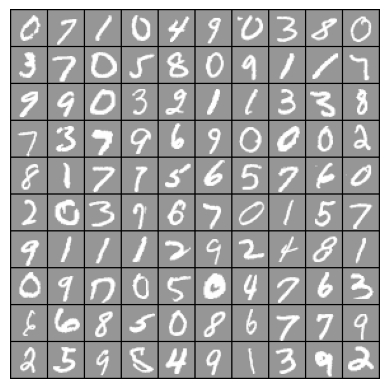

In [173]:
# Randomly select 100 data points to display
random_instances = list(range((size_training)))
random.shuffle(random_instances)
displayData(X_train[random_instances[0:100],:])

In [174]:
X_train.shape

(60000, 784)

In [175]:
X_test.shape

(10000, 28, 28)

In [176]:
X_test=X_test.reshape(10000, 784)

In [177]:
# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train_labels, 10)
y_test = to_categorical(y_test_labels, 10)

In [178]:
y_test.shape

(10000, 10)

In [179]:
# Define the model architecture
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [180]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [181]:
X_train.shape

(60000, 784)

In [182]:
# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2203 - accuracy: 0.9351
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0789 - accuracy: 0.9754
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0528 - accuracy: 0.9830
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0354 - accuracy: 0.9885
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0269 - accuracy: 0.9912


In [184]:
# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.09431955218315125
Test accuracy: 0.9746000170707703


In [185]:
y_pred= model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


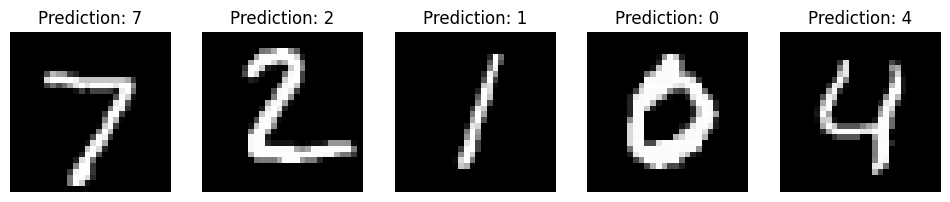

In [204]:
# Select a few images and their predictions
indices = [0, 1, 2, 3, 4]
images = X_test_images[indices]
predictions = y_pred[indices]

# Plot the images and predictions
fig, axs = plt.subplots(1, len(indices), figsize=(12, 3))
for i, ax in enumerate(axs):
    ax.imshow(images[i], cmap='gray')
    ax.axis('off')
    ax.set_title("Prediction: {}".format(argmax(predictions[i])))
plt.show()

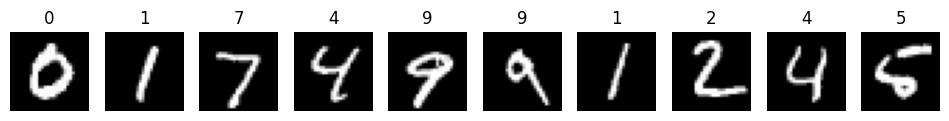

In [216]:
# Randomly select 100 data points to display
random_instances= list(range((10)))
random.shuffle(random_instances) 
images = X_test_images[random_instances]
predictions = y_pred[random_instances]

# Plot the images and predictions
fig, axs = plt.subplots(1, len(random_instances), figsize=(12, 10))
for i ,ax  in enumerate(axs):
    ax.imshow(images[i], cmap='gray')
    ax.axis('off')
    ax.set_title(format(argmax(predictions[i])))
plt.show()